# Statystyka Opisowa Zadanie

Dokonaj statystycznej analizy (obliczenie średniej, kwartyli czy wykresów pudełkowych) dla zmiennej Fare (opłata).

#### Wczytanie danych i bibliotek

In [1]:
# manipulacja danymi
import numpy as np
import pandas as pd

# wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

# statystyczna analiza danych
from scipy import stats

# przygotowanie danych
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dataset = pd.read_csv('train.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Sprawdzenie danych o biletach

Na cenę biletu na pewno wpływa klasa podróży oraz port zokrętowania. Usunięcie brakujących wartości.

In [2]:
filtered_dataset = dataset.dropna(subset=['Fare', 'Embarked', 'Pclass'])

In [3]:
fare_values = filtered_dataset.loc[filtered_dataset['Fare'].notnull(), 'Fare'].values
embarked_values = filtered_dataset.loc[filtered_dataset['Embarked'].notnull(), 'Embarked'].values
pclass_values = filtered_dataset.loc[filtered_dataset['Pclass'].notnull(), 'Pclass'].values
print(fare_values.shape)
print(embarked_values.shape)
print(pclass_values.shape)

(889,)
(889,)
(889,)


<Axes: >

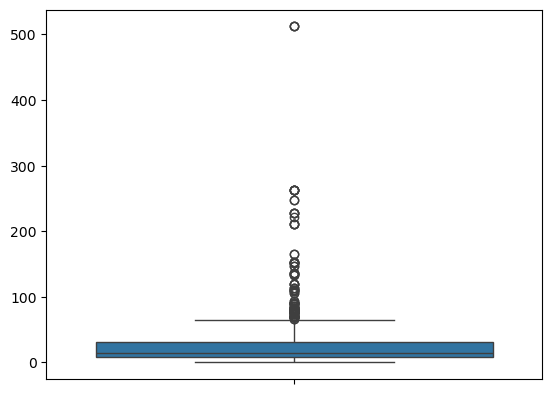

In [4]:
sns.boxplot(fare_values)

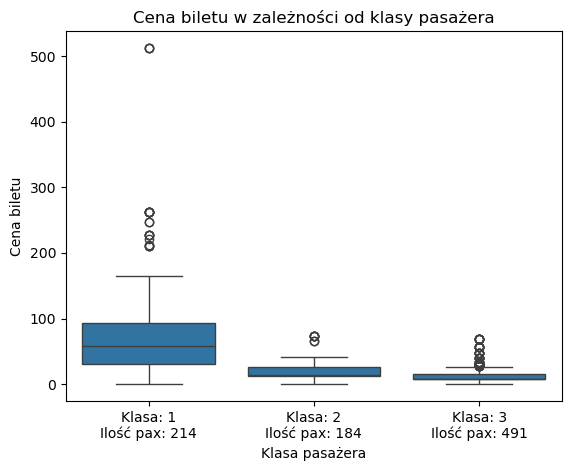

In [5]:
# Wykresy pudełkowe dla ceny biletu ze względu na klasę pasażera 
sns.boxplot(x='Pclass', y='Fare', data=filtered_dataset)
plt.xlabel('Klasa pasażera')
plt.ylabel('Cena biletu')
plt.title('Cena biletu w zależności od klasy pasażera')
counts = filtered_dataset['Pclass'].value_counts().sort_index()
xticks_labels = [f'Klasa: {pclass}\nIlość pax: {counts[pclass]}' for pclass in sorted(filtered_dataset['Pclass'].unique())]
plt.xticks(ticks=range(len(xticks_labels)), labels=xticks_labels)
plt.show()

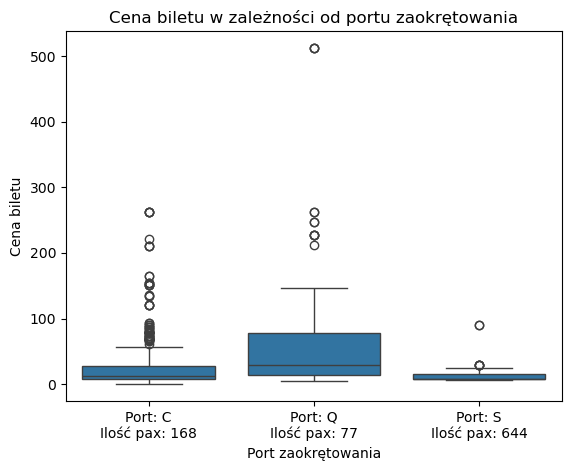

In [6]:
# Wykres pudełkowy dla ceny biletu ze względu na port zaokrętowania
sns.boxplot(x='Embarked', y='Fare', data=filtered_dataset)
plt.xlabel('Port zaokrętowania')
plt.ylabel('Cena biletu')
plt.title('Cena biletu w zależności od portu zaokrętowania')
counts = filtered_dataset['Embarked'].value_counts().sort_index()
xticks_labels = [f'Port: {embarked}\nIlość pax: {counts[embarked]}' for embarked in sorted(filtered_dataset['Embarked'].unique())]
plt.xticks(ticks=range(len(xticks_labels)), labels=xticks_labels)
plt.show()

Dane są bardzo spłaszczone, jednakże są wnioski. Port S był najbarrdziej popularny, a port Q to port VIP.

#### Histogram

Wyliczenie danych do histogramu

In [7]:
mean_fare = np.mean(fare_values)
median_fare = np.median(fare_values)
mode_fare = stats.mode(fare_values)
q0 = np.quantile(fare_values, 0.0)
q1 = np.quantile(fare_values, 0.25)
q3 = np.quantile(fare_values, 0.75)
q4 = np.quantile(fare_values, 1.0)
print(f'Mean: {mean_fare}')
print(f'Median: {median_fare}')
print(f'Mode: {mode_fare}')
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q2: {median_fare}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')

Mean: 32.09668087739032
Median: 14.4542
Mode: ModeResult(mode=8.05, count=43)
Q0: 0.0
Q1: 7.8958
Q2: 14.4542
Q3: 31.0
Q4: 512.3292


Stworzenie histogramu

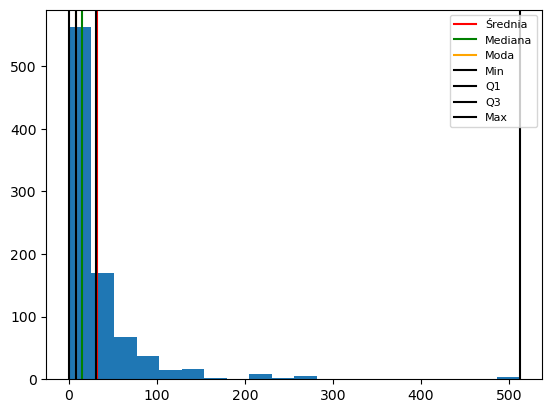

In [8]:
plt.hist(fare_values, bins=20)
plt.axvline(x = mean_fare, color = 'red', label = 'Średnia')
plt.axvline(x = median_fare, color = 'green', label = 'Mediana')
plt.axvline(x = mode_fare[0], color = 'orange', label = 'Moda')
plt.axvline(x = q0, color = 'black', label = 'Min')
plt.axvline(x = q1, color = 'black', label = 'Q1')
plt.axvline(x = q3, color = 'black', label = 'Q3')
plt.axvline(x = q4, color = 'black', label = 'Max')
plt.legend(loc = 'upper right', fontsize = 8)
plt.show()

#### Pozbycie się wartości odstających

Mean: 17.82209070967742
Median: 13.0
Mode: ModeResult(mode=8.05, count=43)
Q0: 0.0
Q1: 7.8958
Q2: 13.0
Q3: 26.0
Q4: 65.0


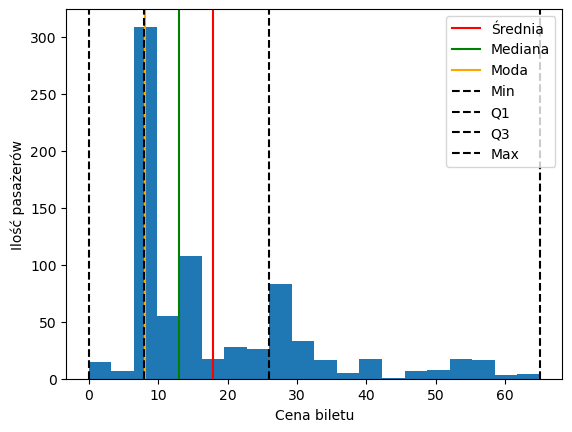

In [9]:
IQR = q3 - q1
upper_limit = q3 + 1.5 * IQR

# Usuwanie wartości odstających
filtered_dataset_capped = filtered_dataset[filtered_dataset['Fare'] <= upper_limit]

fare_values_capped = filtered_dataset_capped['Fare'].values
pclass_values_capped = filtered_dataset_capped['Pclass'].values
embarked_values_capped = filtered_dataset_capped['Embarked'].values

# Wyliczenie statystyk dla danych po usunięciu wartości odstających
mean_fare_capped = np.mean(fare_values_capped)
median_fare_capped = np.median(fare_values_capped)
mode_fare_capped = stats.mode(fare_values_capped)
q0_capped = np.quantile(fare_values_capped, 0.0)
q1_capped = np.quantile(fare_values_capped, 0.25)
q3_capped = np.quantile(fare_values_capped, 0.75)
q4_capped = np.quantile(fare_values_capped, 1.0)

print(f'Mean: {mean_fare_capped}')
print(f'Median: {median_fare_capped}')
print(f'Mode: {mode_fare_capped}')
print(f'Q0: {q0_capped}')
print(f'Q1: {q1_capped}')
print(f'Q2: {median_fare_capped}')
print(f'Q3: {q3_capped}')
print(f'Q4: {q4_capped}')

# Wykres histogramu dla cen biletów po usunięciu wartości odstających
plt.hist(fare_values_capped, bins=20)
plt.axvline(x = mean_fare_capped, color = 'red', label = 'Średnia')
plt.axvline(x = median_fare_capped, color = 'green', label = 'Mediana')
plt.axvline(x = mode_fare_capped[0], color = 'orange', label = 'Moda')
plt.axvline(x = q0_capped, color = 'black', linestyle = '--', label = 'Min')
plt.axvline(x = q1_capped, color = 'black', linestyle = '--', label = 'Q1')
plt.axvline(x = q3_capped, color = 'black', linestyle = '--', label = 'Q3')
plt.axvline(x = q4_capped, color = 'black', linestyle = '--', label = 'Max')
plt.legend(loc = 'upper right')
plt.xlabel('Cena biletu')
plt.ylabel('Ilość pasażerów')
plt.show()

#### Powtorzenie wykresów pudełkowych po usunięciu wartości odstających

<Axes: >

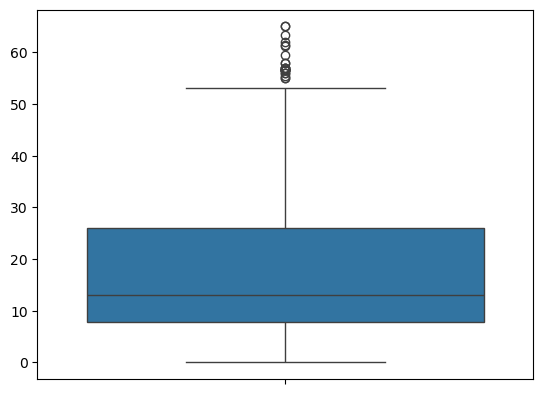

In [10]:
sns.boxplot(fare_values_capped)

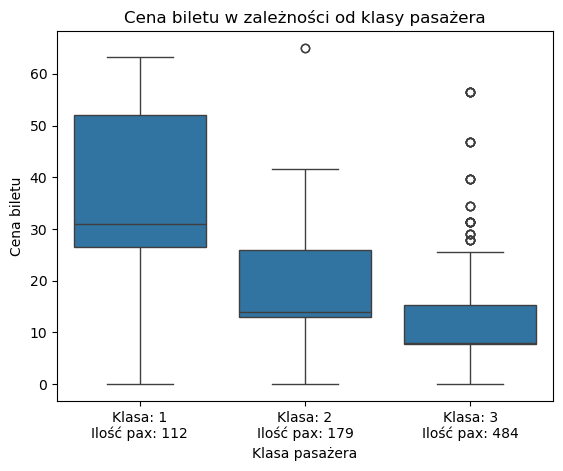

In [11]:
# Wykresy pudełkowe dla ceny biletu ze względu na klasę pasażera 
sns.boxplot(x = pclass_values_capped, y = fare_values_capped)
plt.xlabel('Klasa pasażera')
plt.ylabel('Cena biletu')
plt.title('Cena biletu w zależności od klasy pasażera')
counts = pd.Series(pclass_values_capped).value_counts().sort_index()
xticks_labels = [f'Klasa: {pclass}\nIlość pax: {counts[pclass]}' for pclass in sorted(pd.Series(pclass_values_capped).unique())]
plt.xticks(ticks=range(len(xticks_labels)), labels=xticks_labels)
plt.show()

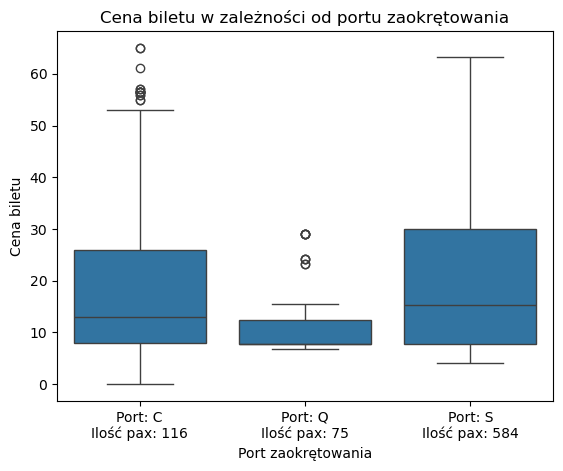

In [12]:
# Wykres pudełkowy dla ceny biletu ze względu na port zaokrętowania
sns.boxplot(x = embarked_values_capped, y = fare_values_capped)
plt.xlabel('Port zaokrętowania')
plt.ylabel('Cena biletu')
plt.title('Cena biletu w zależności od portu zaokrętowania')
counts = pd.Series(embarked_values_capped).value_counts().sort_index()
xticks_labels = [f'Port: {embarked}\nIlość pax: {counts[embarked]}' for embarked in sorted(pd.Series(embarked_values_capped).unique())]
plt.xticks(ticks=range(len(xticks_labels)), labels=xticks_labels)
plt.show()